<a href="https://colab.research.google.com/github/nishamishra12/Battle/blob/master/DMT_Project_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

Aim is to separate customers into groups that reflect similarities among customers in each cluster.

Data Source: Kaggle (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)

Data contains following features:

* People

  * ID: Customer's unique identifier
  * Year_Birth: Customer's birth year
  * Education: Customer's education level
  * Marital_Status: Customer's marital status
  * Income: Customer's yearly household income
  * Kidhome: Number of children in customer's household
  * Teenhome: Number of teenagers in customer's household
  * Dt_Customer: Date of customer's enrollment with the company
  * Recency: Number of days since customer's last purchase
  * Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* Products

  * MntWines: Amount spent on wine in last 2 years
  * MntFruits: Amount spent on fruits in last 2 years
  * MntMeatProducts: Amount spent on meat in last 2 years
  * MntFishProducts: Amount spent on fish in last 2 years
  * MntSweetProducts: Amount spent on sweets in last 2 years
  * MntGoldProds: Amount spent on gold in last 2 years

* Promotion

  * NumDealsPurchases: Number of purchases made with a discount
  * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place

  * NumWebPurchases: Number of purchases made through the company’s website
  * NumCatalogPurchases: Number of purchases made using a catalogue
  * NumStorePurchases: Number of purchases made directly in stores
  * NumWebVisitsMonth: Number of visits to company’s website in the last month


## Import libraries and load the data

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/CS6220 DMT/data/'
data = pd.read_csv(path + "marketing_campaign.csv", sep='\t')
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


## Exploratory Data Analysis and Preprocessing

In [ ]:
data.shape

(2240, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

dt_customer to datetime

sum expenses and accepted campaigns

categorical feats - one hot encoding before passing to model

In [ ]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income has 24 missing values - impute with means

In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

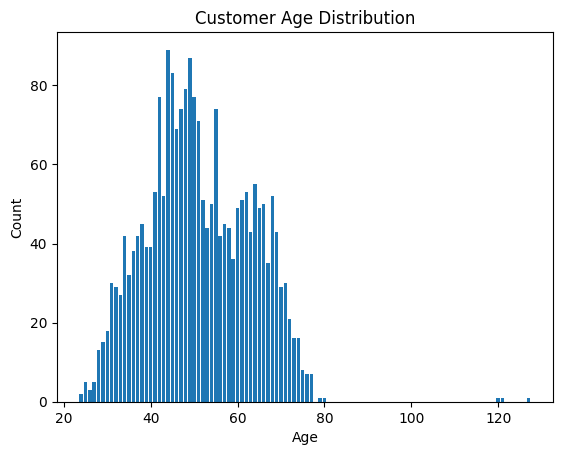

In [ ]:
#this data was not updated since 2 years.

ages = 2020 - data['Year_Birth']
ages_count = ages.value_counts()

x = list(ages_count.keys())
y = list(ages_count)

plt.bar(x,y)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most customers are in their thirties or forties. Few outliers with > 80 age.

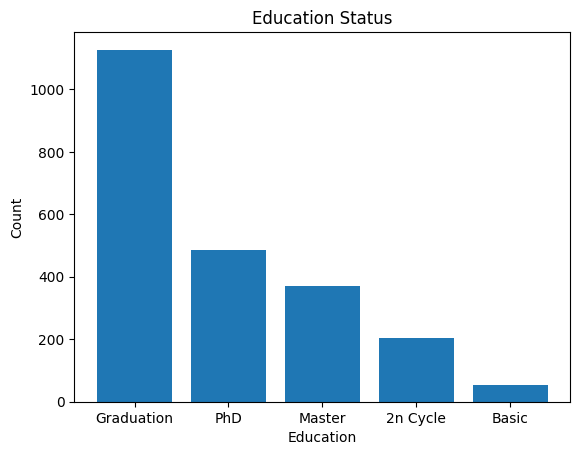

In [ ]:
x = list(data['Education'].value_counts().keys())
y = list(data['Education'].value_counts())

plt.bar(x,y)
plt.title('Education Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Mostly graduate level educated customers.

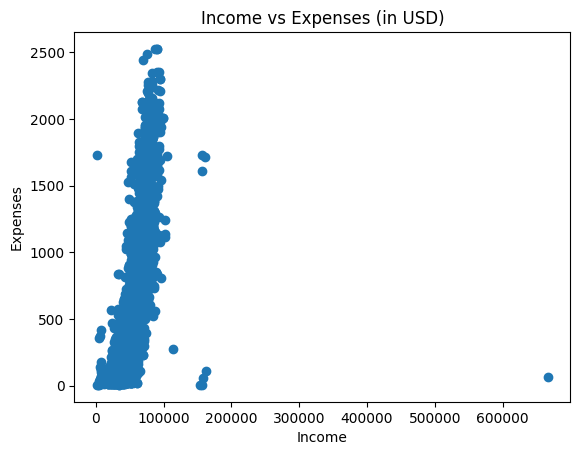

In [ ]:
total_expenses = data['MntWines'] + data['MntFruits'] + data['MntGoldProds'] + data['MntFishProducts'] + data['MntMeatProducts'] + data['MntSweetProducts']
plt.scatter(data['Income'], total_expenses)
plt.title('Income vs Expenses (in USD)')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()


Removing the customer with very high income to get a closer look at the general spending power of customers. 

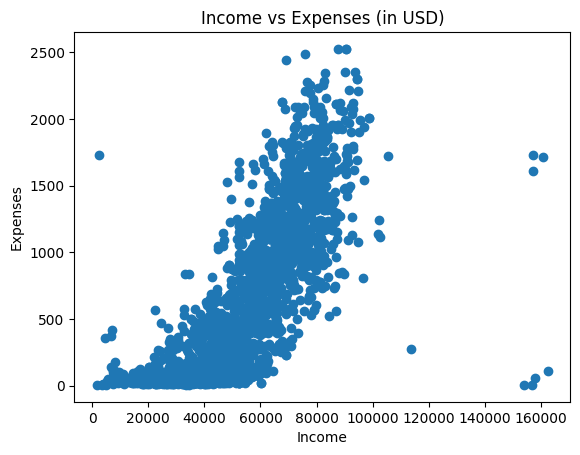

In [ ]:
filtered = data[data['Income'] < 300000]

total_expenses = filtered['MntWines'] + filtered['MntFruits'] + filtered['MntGoldProds'] + filtered['MntFishProducts'] + filtered['MntMeatProducts'] + filtered['MntSweetProducts']

plt.scatter(filtered['Income'], total_expenses)
plt.title('Income vs Expenses (in USD)')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

<ipython-input-23-02d598cb282b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Expenses'] = filtered['MntWines'] + filtered['MntFruits'] + filtered['MntGoldProds'] + filtered['MntFishProducts'] + filtered['MntMeatProducts'] + filtered['MntSweetProducts']


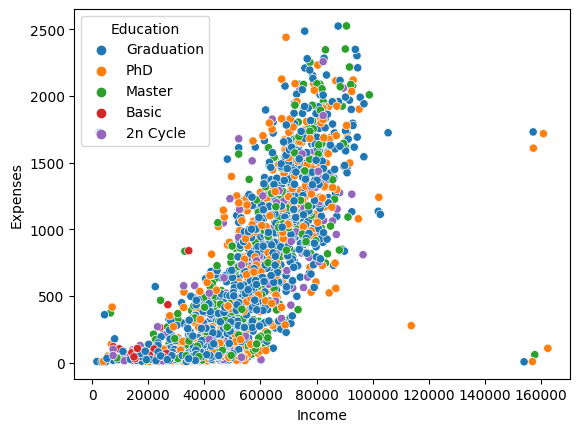

In [ ]:
import seaborn as sns

filtered = data.loc[data['Income'] < 300000]
filtered['Expenses'] = filtered['MntWines'] + filtered['MntFruits'] + filtered['MntGoldProds'] + filtered['MntFishProducts'] + filtered['MntMeatProducts'] + filtered['MntSweetProducts']

sns.scatterplot(x='Income', y='Expenses', data=filtered, hue='Education')
plt.show();

## Feature Engineering

Too many features - PCA?

## Model Implementation

Clustering

## Model Evaluation